<a href="https://colab.research.google.com/github/ndubuisijosephalx/Data-Science-projects/blob/main/reinforcent_Ndubuisi_J_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!jupyter contrib nbextension install --user

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#!jupyter nbextension enable hinterland/hinterland

In [ ]:
#Download NLTK resources (only needed if not downloaded previously)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
cd /content/drive/MyDrive/python packages

/content/drive/MyDrive/python packages


In [ ]:
os.chdir('/content/drive/MyDrive/python packages')

# Import the Required Libraries for the Project Task

In [ ]:
import spacy
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.svm import SVC
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Load the Corpus as Csv

In [ ]:
# resume_corpus = pd.read_csv(r"C:\Users\HP\Desktop\dataset\Resume.csv",sep=',')
resume_corpus = pd.read_csv(r"/content/drive/MyDrive/Msc Reinforcement learning/Resume.csv",sep=',')

In [ ]:
# Set 'display.max_colwidth' to None to show the full content of all columns
#pd.set_option('display.max_colwidth', None)

# Set 'display.max_rows' to None to show all rows without truncation
#pd.set_option('display.max_rows', None)

In [ ]:
resume_corpus.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
resume_corpus.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [ ]:
resume_corpus.shape

(2484, 4)

# Class Percentage

In [ ]:
# Compute the class percentage
class_percentage = resume_corpus['Category'].value_counts()/len(resume_corpus)*100
# diplay the result
class_percentage

INFORMATION-TECHNOLOGY    4.830918
BUSINESS-DEVELOPMENT      4.830918
FINANCE                   4.750403
ADVOCATE                  4.750403
ACCOUNTANT                4.750403
ENGINEERING               4.750403
CHEF                      4.750403
AVIATION                  4.710145
FITNESS                   4.710145
SALES                     4.669887
BANKING                   4.629630
HEALTHCARE                4.629630
CONSULTANT                4.629630
CONSTRUCTION              4.508857
PUBLIC-RELATIONS          4.468599
HR                        4.428341
DESIGNER                  4.307568
ARTS                      4.146538
TEACHER                   4.106280
APPAREL                   3.904992
DIGITAL-MEDIA             3.864734
AGRICULTURE               2.536232
AUTOMOBILE                1.449275
BPO                       0.885668
Name: Category, dtype: float64

# Class Frequency

In [ ]:
class_frequency = resume_corpus.Category.value_counts()
class_frequency

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

# Visualise the Class Frequency

<Axes: >

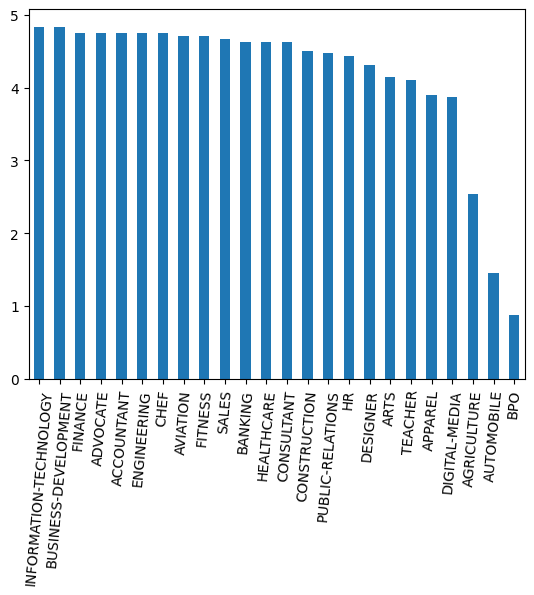

In [ ]:
class_percentage.plot(kind = 'bar',rot=85)

# Visualise the Class Frequency and Percentage

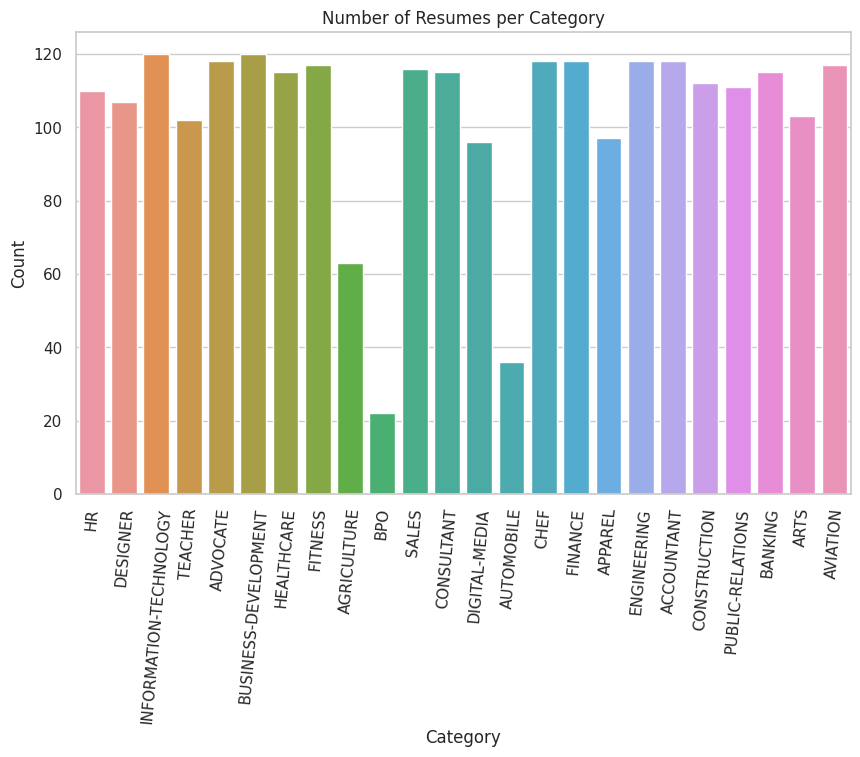

In [ ]:
# Plotting the value counts of the 'Category' column as a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=resume_corpus)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Resumes per Category')
plt.xticks(rotation=85)
plt.show()

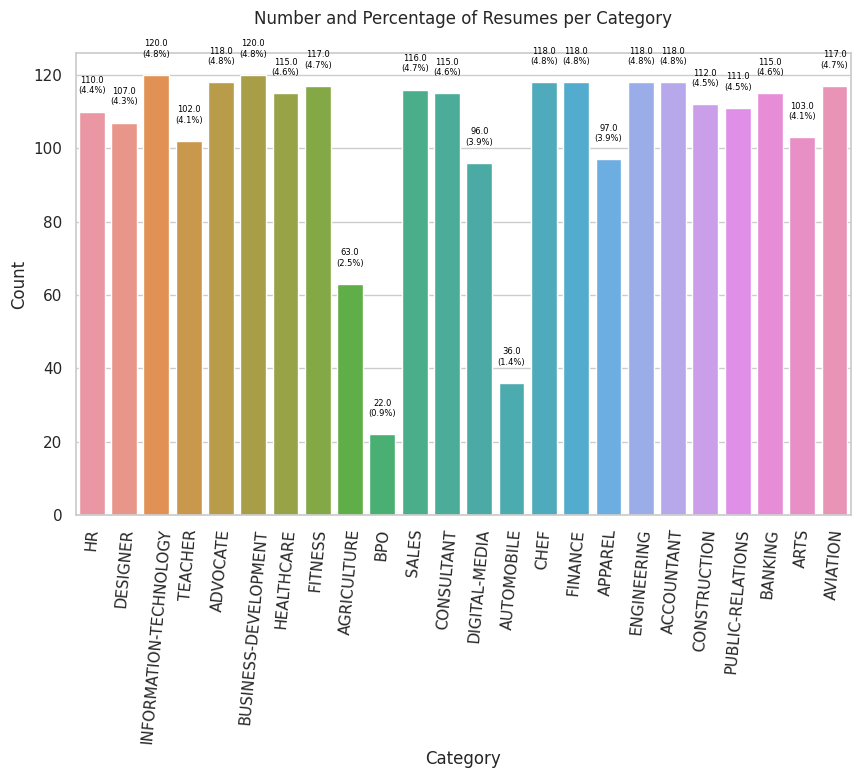

In [ ]:
category_counts = resume_corpus['Category'].value_counts()
total_resumes = len(resume_corpus)
category_percentages = (category_counts / total_resumes) * 100

# Plotting the value counts of the 'Category' column as a count plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Category', data=resume_corpus)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number and Percentage of Resumes per Category\n')

# Add percentage values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height}\n({height/total_resumes*100:.1f}%)',
            ha='center', fontsize=6, color='black')

plt.xticks(rotation=85)
plt.show()

# Check for Missing or Null Values

In [ ]:
resume_corpus.isna().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

# Examine the information about the corpus

In [ ]:
resume_corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [ ]:
resume_corpus.Category.nunique()

24

In [ ]:
resume_corpus.nunique()

ID             2484
Resume_str     2482
Resume_html    2482
Category         24
dtype: int64

In [ ]:
resume_corpus.duplicated().sum()

0

# Data Cleaning

In [ ]:
# Drop unwanted columns
resume_corpus.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [ ]:
# Drop unwanted columns
resume_corpus_refined = resume_corpus.drop(columns=['ID','Resume_html'])
resume_corpus_refined.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


## Rename the Category to class for clarity

In [ ]:
resume_corpus_refined = resume_corpus_refined.rename(columns={'Category':'class','Resume_str':'resume'})
resume_corpus_refined

,resume,class
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


# Convert the class strings to numerical labels

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'class' column to numerical labels
resume_corpus_refined['class_numerical'] = label_encoder.fit_transform(resume_corpus_refined['class'])

# Display the updated DataFrame
print(resume_corpus_refined.head())

                                              resume class  class_numerical
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...    HR               19
1           HR SPECIALIST, US HR OPERATIONS      ...    HR               19
2           HR DIRECTOR       Summary      Over 2...    HR               19
3           HR SPECIALIST       Summary    Dedica...    HR               19
4           HR MANAGER         Skill Highlights  ...    HR               19


In [ ]:
# Get the unique values of the 'class' column
unique_class_values = resume_corpus_refined['class'].unique()

# Get the unique values of the 'class_numerical' column
unique_class_numerical_values = resume_corpus_refined['class_numerical'].unique()

# Create a dictionary matching unique class values with numerical class values
class_mapping_dict = {class_value: class_numerical_value for class_value, class_numerical_value in zip(unique_class_values, unique_class_numerical_values)}

# Print the unique values and their corresponding numerical values together
print("Unique values and their corresponding numerical values:")
for class_value, class_numerical_value in class_mapping_dict.items():
    print(f"'{class_value}' -> {class_numerical_value}")

Unique values and their corresponding numerical values:
'HR' -> 19
'DESIGNER' -> 13
'INFORMATION-TECHNOLOGY' -> 20
'TEACHER' -> 23
'ADVOCATE' -> 1
'BUSINESS-DEVELOPMENT' -> 9
'HEALTHCARE' -> 18
'FITNESS' -> 17
'AGRICULTURE' -> 2
'BPO' -> 8
'SALES' -> 22
'CONSULTANT' -> 12
'DIGITAL-MEDIA' -> 14
'AUTOMOBILE' -> 5
'CHEF' -> 10
'FINANCE' -> 16
'APPAREL' -> 3
'ENGINEERING' -> 15
'ACCOUNTANT' -> 0
'CONSTRUCTION' -> 11
'PUBLIC-RELATIONS' -> 21
'BANKING' -> 7
'ARTS' -> 4
'AVIATION' -> 6


In [ ]:
# Create a mapping dictionary for the 'class' column
class_mapping = {category: i for i, category in enumerate(resume_corpus_refined['class'].unique())}

# Map the 'class' column to numerical values
resume_corpus_refined['class_numerical'] = resume_corpus_refined['class'].map(class_mapping)

# Display the updated DataFrame
print(resume_corpus_refined.head())

                                              resume class  class_numerical
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...    HR                0
1           HR SPECIALIST, US HR OPERATIONS      ...    HR                0
2           HR DIRECTOR       Summary      Over 2...    HR                0
3           HR SPECIALIST       Summary    Dedica...    HR                0
4           HR MANAGER         Skill Highlights  ...    HR                0


# Text Preprocessing

## Method 1: Preprocess Text with nltk

In [ ]:
#nltk.download('omw')

[nltk_data] Error loading omw: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [ ]:
import nltk
#nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Preprocess the Text nltk

In [41]:
nlp = spacy.load("en_core_web_md")

OSError: ignored

In [ ]:
# Text preprocessing function
def preprocess_text_nltk(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove special characters and numbers
    tokens = [token for token in tokens if token.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]
    # Perform stemming or lemmatization (choose one)
    #porter = PorterStemmer()
    #tokens = [porter.stem(token) for token in tokens]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

# Apply preprocessing to 'Resume_str' column
resume_corpus_refined['Cleaned_Resume'] = resume_corpus_refined['resume'].apply(preprocess_text_nltk)

# Now cv_data['Cleaned_Resume'] column contains the preprocessed text data

# Print a sample preprocessed resume
print(resume_corpus_refined['Cleaned_Resume'].iloc[0])

hr associate hr administrator summary dedicated customer service manager year experience hospitality customer service management respected builder leader team strives instill shared enthusiastic commitment customer service highlight focused customer satisfaction team management marketing savvy conflict resolution technique training development skilled client relation specialist accomplishment missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton worldwide general manager training certification accomplished trainer cross server hospitality system hilton onq micros opera pm fidelio opera reservation system or holidex completed course seminar customer service sale strategy inventory control loss prevention safety time management leadership performance assessment experience hr associate hr administrator dec current company name city state help develop policy directs coordinate activity employment compensation labor relation benefit training 

## Method 2: Preprocess Text with TFIDF

In [ ]:
# Text preprocessing function
def preprocess_text_tfidf(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]
    return " ".join(tokens)

# Apply preprocessing to 'Resume_str' column
resume_corpus_refined['Resume'] = resume_corpus_refined['resume'].apply(preprocess_text_tfidf)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'Cleaned_Resume' text data into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(resume_corpus_refined['Resume'])

# Convert the TF-IDF vectors to a DataFrame for better readability (optional)
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Now you have the preprocessed text data represented as TF-IDF vectors in 'tfidf_vectors'
# The 'tfidf_df' DataFrame contains the same information but in a more readable format

# Print the first few rows of the 'tfidf_df' DataFrame
display(tfidf_df.head())

,00,000,0001,00019,000401,000k,000mdthd,000sq,000sqft,001,...,zzxzx,µpg,çatalhöyük,école,ética,étiquette,éxito,òwaterfalló,últimos,ﬁlm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Build the First Baseline Model with our TFIDF Vector

## Logistic Regression Classifier

X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size = 0.2, random_state = 0, stratify = data['label'])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, resume_corpus_refined['class'], test_size=0.2, random_state=42)

# Initialize the logistic regression classifier
classifier = LogisticRegression()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.6378269617706237
Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.81      0.86      0.83        29
              ADVOCATE       0.56      0.63      0.59        30
           AGRICULTURE       0.50      0.12      0.20         8
               APPAREL       0.57      0.40      0.47        20
                  ARTS       0.11      0.11      0.11        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.72      0.86      0.78        21
               BANKING       0.71      0.65      0.68        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.84      0.59      0.70        27
                  CHEF       0.85      0.71      0.77        24
          CONSTRUCTION       0.90      0.76      0.83        34
            CONSULTANT       0.50      0.25      0.33        20
              DESIGNER       0.73      0.84      0

In [ ]:
set(resume_corpus_refined['class'])
resume_corpus_refined['class'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

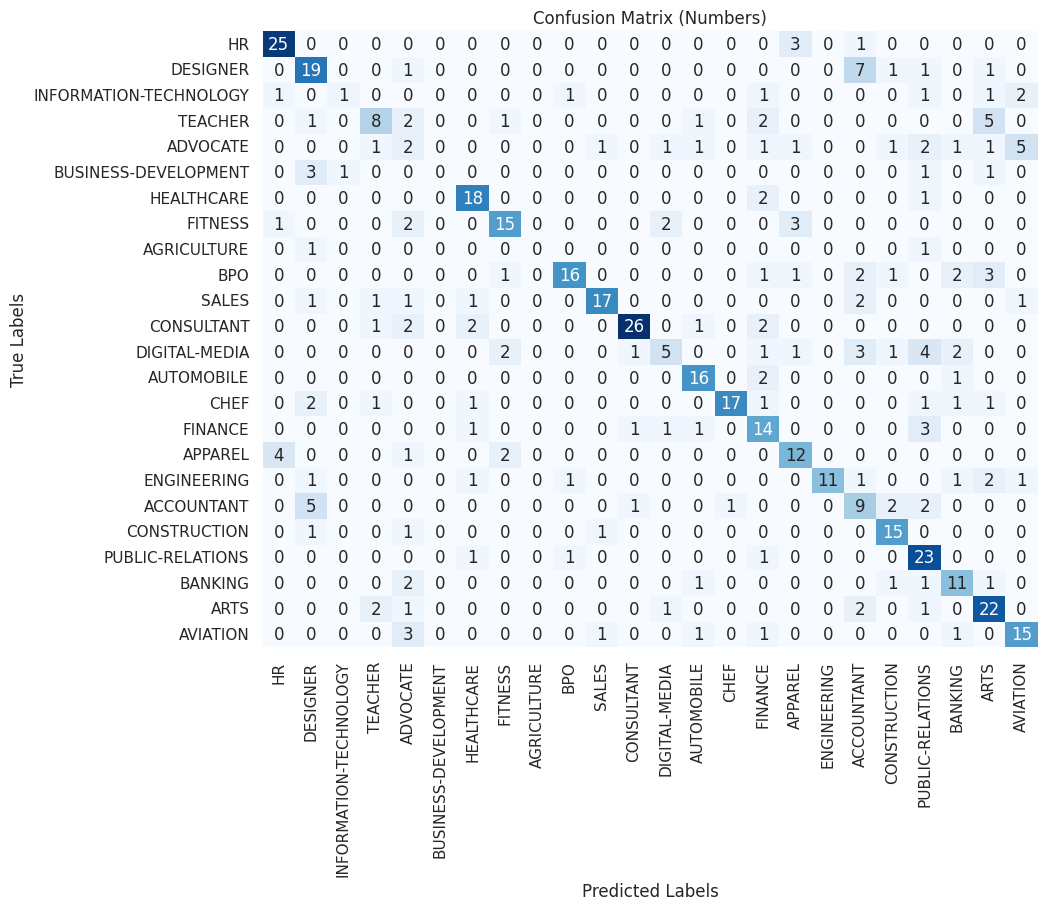

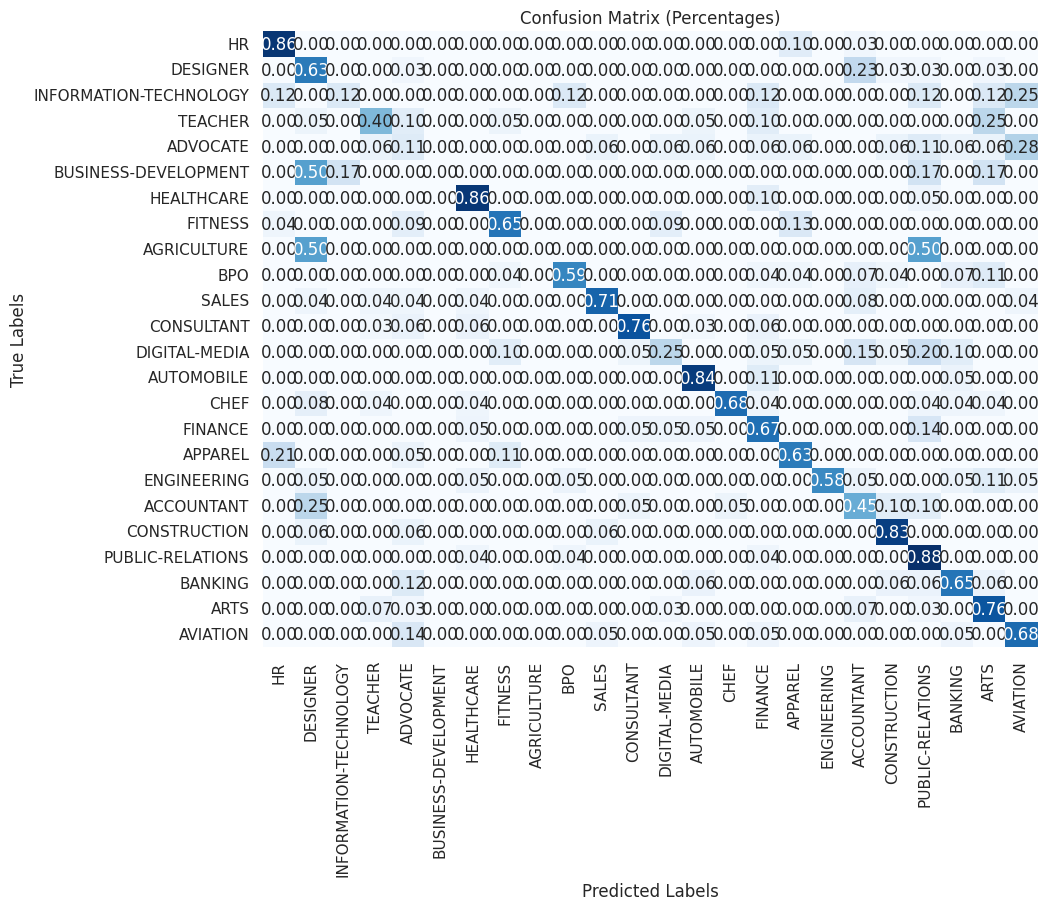

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels = resume_corpus_refined['class'].unique()

# Plot the confusion matrix heatmap with custom labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Numbers)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()

## Support Vector Machine Classifier with ITIDF Vectors

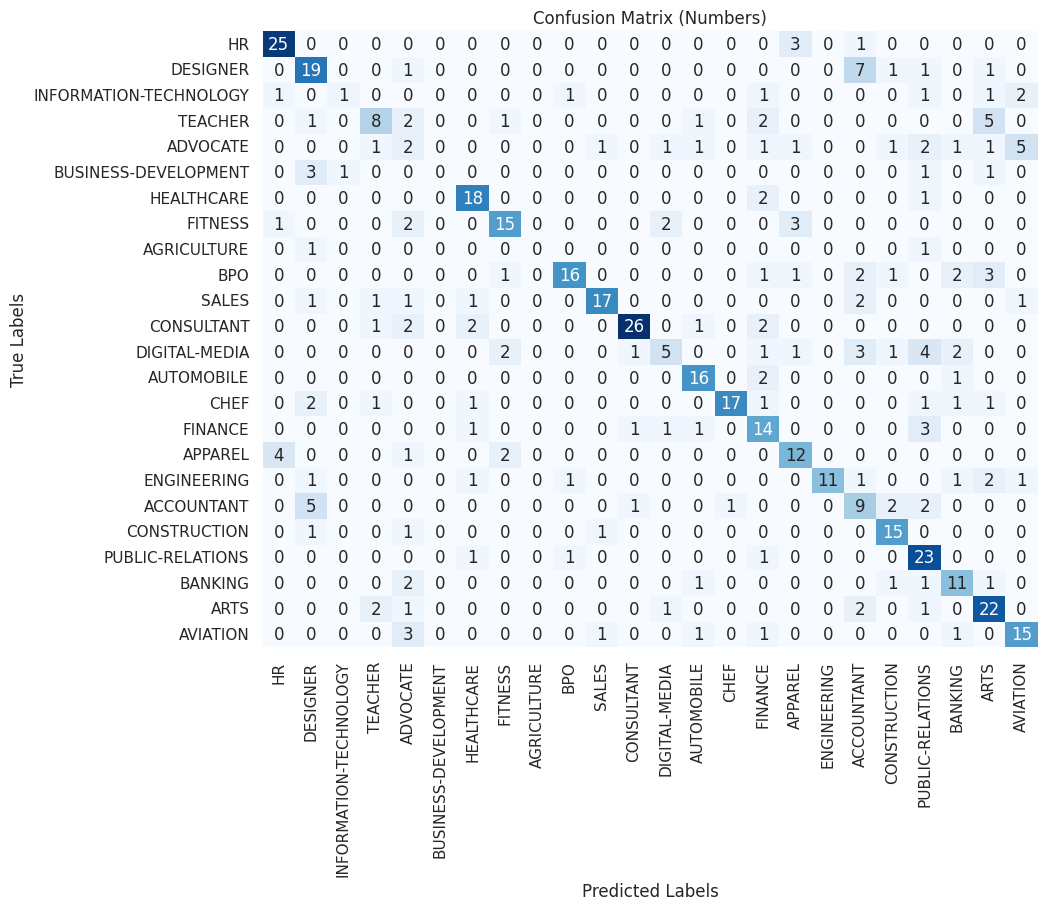

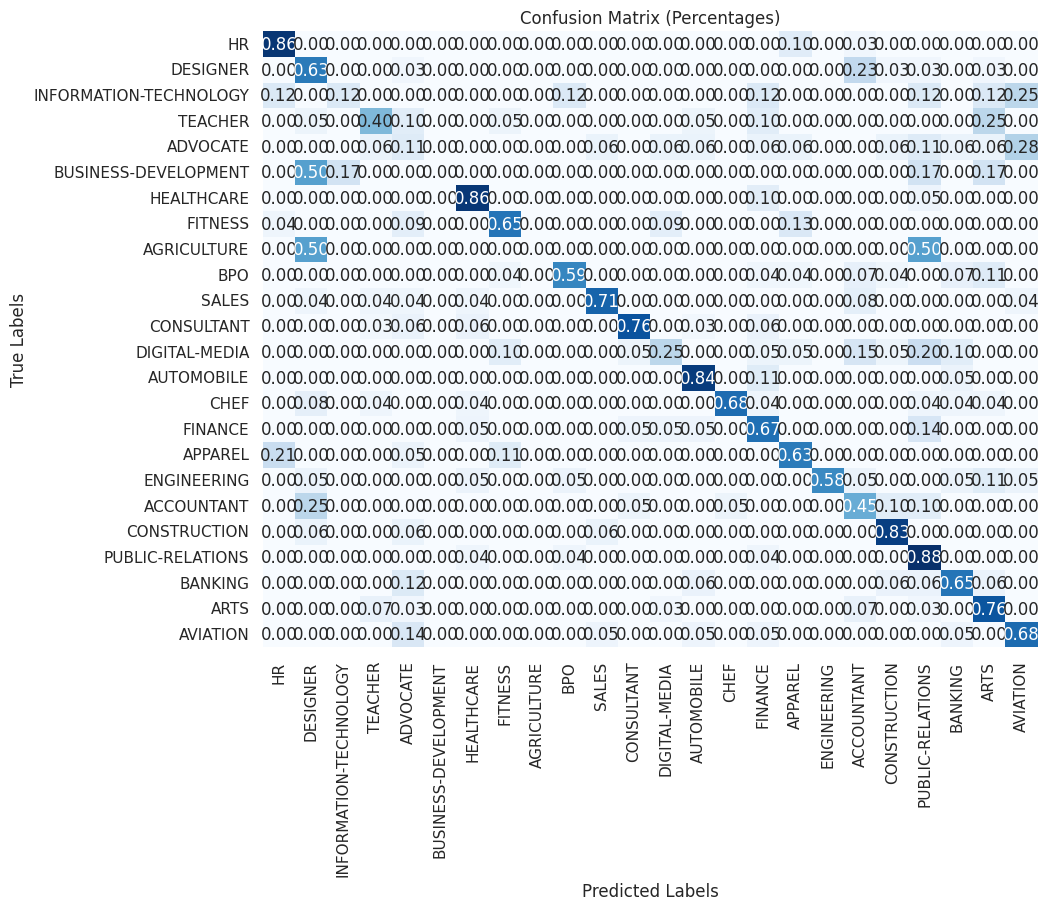

In [ ]:

# Initialize the Support Vector Machine (SVM) classifier
# For binary classification, use SVC(kernel='linear')
# For multiclass classification, use SVC(kernel='linear', decision_function_shape='ovr') or SVC(kernel='linear', decision_function_shape='ovo')
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_2 = svm_classifier.predict(X_test)

# Create a confusion matrix
cm_2 = confusion_matrix(y_test, y_pred_2)

# Calculate the percentages
cm_percentage_2 = cm_2.astype('float') / cm_2.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels = resume_corpus_refined['class'].unique()

# Plot the confusion matrix heatmap with custom labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Numbers)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()

##  Evaluate the Model Performance

In [ ]:
# Evaluate the model's performance
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Accuracy:", accuracy)

report_2 = classification_report(y_test, y_pred_2)
print("Classification Report:\n", report_2)

Accuracy: 0.6378269617706237
Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.79      0.90      0.84        29
              ADVOCATE       0.54      0.63      0.58        30
           AGRICULTURE       0.50      0.12      0.20         8
               APPAREL       0.44      0.35      0.39        20
                  ARTS       0.05      0.06      0.05        18
            AUTOMOBILE       1.00      0.33      0.50         6
              AVIATION       0.74      0.81      0.77        21
               BANKING       0.73      0.70      0.71        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.75      0.56      0.64        27
                  CHEF       0.84      0.67      0.74        24
          CONSTRUCTION       0.89      0.74      0.81        34
            CONSULTANT       0.33      0.35      0.34        20
              DESIGNER       0.76      0.84      0

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def train_and_evaluate_svm_classifier(data, target_column, test_size=0.2, random_state=42):


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, data[target_column], test_size=test_size, random_state=random_state)

    # Initialize the Support Vector Machine (SVM) classifier
    # For binary classification, use SVC(kernel='linear')
    # For multiclass classification, use SVC(kernel='linear', decision_function_shape='ovr') or SVC(kernel='linear', decision_function_shape='ovo')
    classifier = SVC(kernel='linear', decision_function_shape='ovr')

    # Train the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test)

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate the percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Get the unique class labels
    class_labels = data[target_column].unique()

    # Plot the confusion matrix heatmap with custom labels
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix (Numbers)')
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_percentage, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix (Percentages)')
    plt.show()


    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

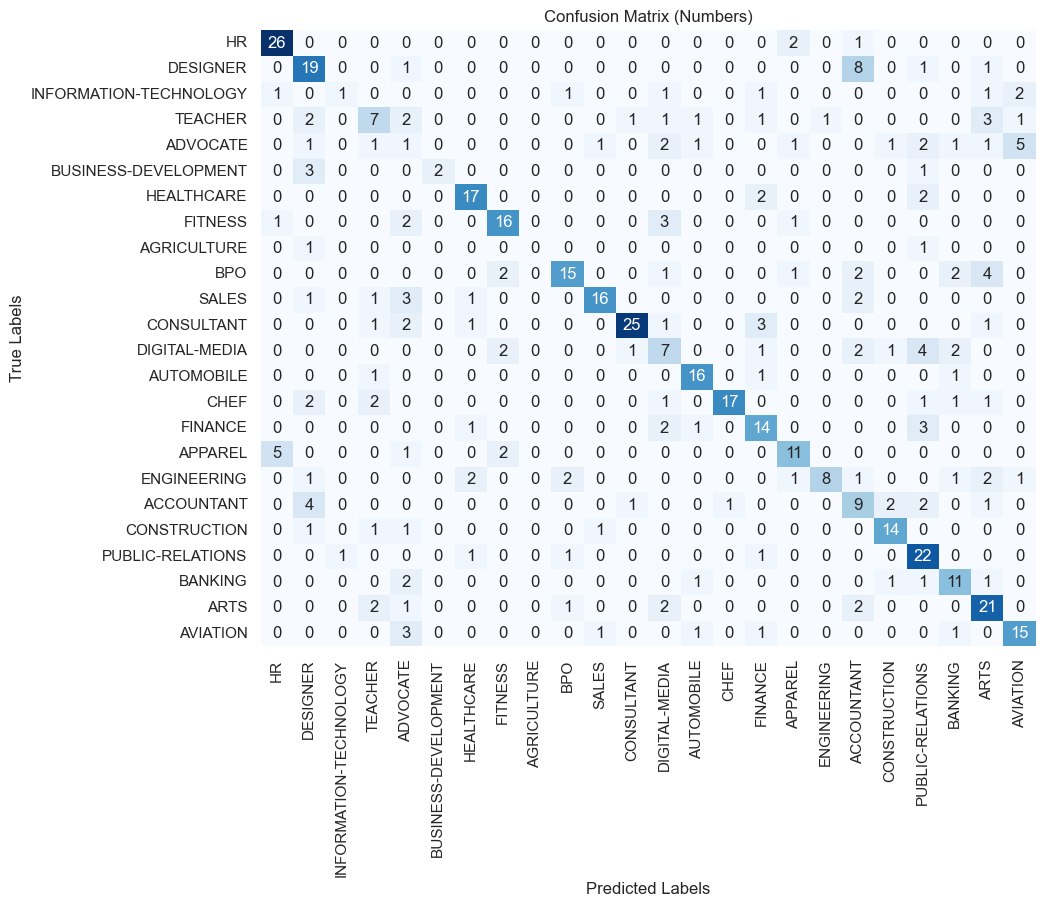

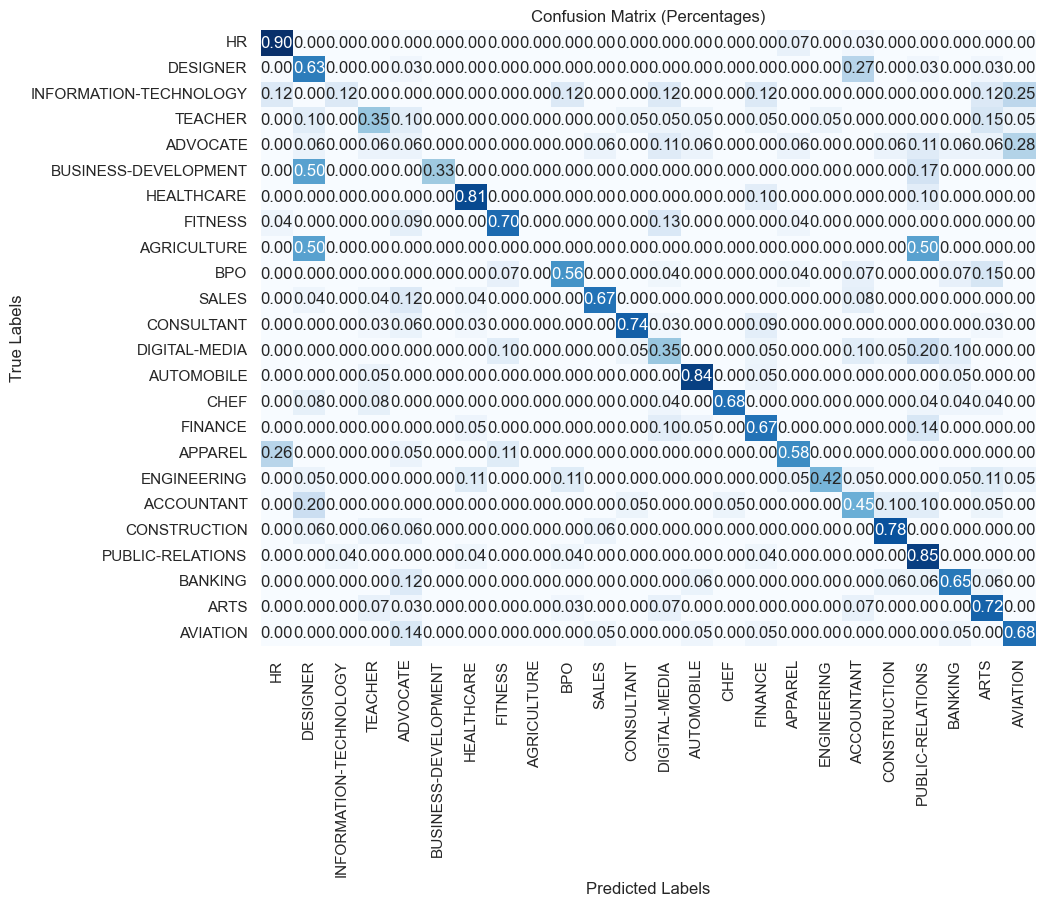

Accuracy: 0.6237424547283702
Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.79      0.90      0.84        29
              ADVOCATE       0.54      0.63      0.58        30
           AGRICULTURE       0.50      0.12      0.20         8
               APPAREL       0.44      0.35      0.39        20
                  ARTS       0.05      0.06      0.05        18
            AUTOMOBILE       1.00      0.33      0.50         6
              AVIATION       0.74      0.81      0.77        21
               BANKING       0.73      0.70      0.71        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.75      0.56      0.64        27
                  CHEF       0.84      0.67      0.74        24
          CONSTRUCTION       0.89      0.74      0.81        34
            CONSULTANT       0.33      0.35      0.34        20
              DESIGNER       0.76      0.84      0

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train_and_evaluate_svm_classifier(resume_corpus_refined, target_column='class')

## Random Forest Model

In [ ]:


# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(tfidf_vectors, resume_corpus_refined['class'], test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with different variable names
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
random_forest_classifier.fit(X_train_rf, y_train_rf)

# Make predictions on the test data
y_pred_rf = random_forest_classifier.predict(X_test_rf)

# Create a confusion matrix
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

# Calculate the percentages
cm_percentage_rf = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels_rf = resume_corpus_refined['class'].unique()

# Plot the confusion matrix heatmap with custom labels for Random Forest model
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels_rf, yticklabels=class_labels_rf)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix (Numbers)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage_rf, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels_rf, yticklabels=class_labels_rf)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix (Percentages)')
plt.show()

NameError: ignored

## Evaluate the Model Performance

In [ ]:
# Evaluate the Random Forest model's performance
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

report_rf = classification_report(y_test_rf, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)

Random Forest Accuracy: 0.6056338028169014
Random Forest Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.65      0.83      0.73        29
              ADVOCATE       0.81      0.57      0.67        30
           AGRICULTURE       0.50      0.12      0.20         8
               APPAREL       0.47      0.35      0.40        20
                  ARTS       0.17      0.06      0.08        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.74      0.81      0.77        21
               BANKING       0.71      0.74      0.72        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.54      0.52      0.53        27
                  CHEF       0.70      0.79      0.75        24
          CONSTRUCTION       0.90      0.82      0.86        34
            CONSULTANT       0.58      0.35      0.44        20
              DESIGNER

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#!python -m spacy download en_core_web_lg

# Preprocess Text with Spacy

## Examing the Resume Content

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(resume_corpus_refined['resume'][0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_,token.is_oov,token.has_vector,token.is_stop)

NameError: ignored

## Process the Text

In [ ]:
import spacy
# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Assuming you have already loaded the data into a DataFrame named resume_corpus_refined
# resume_corpus_refined = pd.read_csv("path_to_your_csv_file.csv")

# Text preprocessing function using spaCy
def preprocess_text_spacy(text):
    doc = nlp(text)
    # Your preprocessing code using spaCy (e.g., lemmatization, removing stop words, etc.)
    processed_text = " ".join([token.lemma_ for token in doc if not token.is_stop])
    return processed_text

# Apply preprocessing using spaCy to 'Resume_str' column if not done earlier
resume_corpus_refined['cleaned_resume'] = resume_corpus_refined['Resume'].apply(preprocess_text_spacy)

NameError: ignored

In [ ]:
resume_corpus_refined['cleaned_resume']

In [ ]:
# Get the set of OOV words
doc = nlp(resume_corpus_refined['cleaned_resume'].to_string())
for token in doc:
    if not token.has_vector:  # Check if the word has a vector representation (i.e., recognized by the model)
        oov_words.add(token.text)

print("Out-of-Vocabulary (OOV) Words:", oov_words)

In [ ]:
doc

In [ ]:

# Apply preprocessing using spaCy to 'Resume_str' column if not done earlier
resume_corpus_refined['cleaned_Resume'] = resume_corpus_refined['resume'].apply(preprocess_text_spacy)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer_spacy = TfidfVectorizer()

# Fit and transform the 'Cleaned_Resume' text data into TF-IDF vectors
tfidf_vectors_spacy = tfidf_vectorizer_spacy.fit_transform(resume_corpus_refined['cleaned_resume'])

# Split the data into training and testing sets
X_train_spacy, X_test_spacy, y_train_spacy, y_test_spacy = train_test_split(tfidf_vectors_spacy, resume_corpus_refined['class'], test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier with different variable names
logistic_classifier_spacy = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier_spacy.fit(X_train_spacy, y_train_spacy)

# Make predictions on the test data
y_pred_spacy = logistic_classifier_spacy.predict(X_test_spacy)

# Create a confusion matrix
cm_spacy = confusion_matrix(y_test_spacy, y_pred_spacy)

# Calculate the percentages
cm_percentage_spacy = cm_spacy.astype('float') / cm_spacy.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels_spacy = resume_corpus_refined['class'].unique()

# Plot the confusion matrix heatmap with custom labels for the Logistic Regression model with spaCy
plt.figure(figsize=(10, 8))
sns.heatmap(cm_spacy, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels_spacy, yticklabels=class_labels_spacy)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix with spaCy (Numbers)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage_spacy, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels_spacy, yticklabels=class_labels_spacy)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix with spaCy (Percentages)')
plt.show()

# Evaluate the Logistic Regression model's performance with spaCy
accuracy_spacy = accuracy_score(y_test_spacy, y_pred_spacy)
print("Logistic Regression Accuracy with spaCy:", accuracy_spacy)

report_spacy = classification_report(y_test_spacy, y_pred_spacy)
print("Logistic Regression Classification Report with spaCy:\n", report_spacy)

# Apply preprocessing using spaCy to 'Resume_str' column if not done earlier
resume_corpus_refined['cleaned_resume'] = resume_corpus_refined['Resume'].apply(preprocess_text_spacy)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer_spacy = TfidfVectorizer()

# Fit and transform the 'Cleaned_Resume' text data into TF-IDF vectors
tfidf_vectors_spacy = tfidf_vectorizer_spacy.fit_transform(resume_corpus_refined['cleaned_resume'])

# Split the data into training and testing sets
X_train_spacy, X_test_spacy, y_train_spacy, y_test_spacy = train_test_split(tfidf_vectors_spacy, resume_corpus_refined['class'], test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier with different variable names
logistic_classifier_spacy = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier_spacy.fit(X_train_spacy, y_train_spacy)

# Make predictions on the test data
y_pred_spacy = logistic_classifier_spacy.predict(X_test_spacy)

# Create a confusion matrix
cm_spacy = confusion_matrix(y_test_spacy, y_pred_spacy)

# Calculate the percentages
cm_percentage_spacy = cm_spacy.astype('float') / cm_spacy.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels_spacy = resume_corpus_refined['class'].unique()

# Plot the confusion matrix heatmap with custom labels for the Logistic Regression model with spaCy
plt.figure(figsize=(10, 8))
sns.heatmap(cm_spacy, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels_spacy, yticklabels=class_labels_spacy)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix with spaCy (Numbers)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage_spacy, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels_spacy, yticklabels=class_labels_spacy)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix with spaCy (Percentages)')
plt.show()



## Evaluate the Model Performance

In [ ]:
# Evaluate the Logistic Regression model's performance with spaCy
accuracy_spacy = accuracy_score(y_test_spacy, y_pred_spacy)
print("Logistic Regression Accuracy with spaCy:", accuracy_spacy)

report_spacy = classification_report(y_test_spacy, y_pred_spacy)
print("Logistic Regression Classification Report with spaCy:\n", report_spacy)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the spaCy English language model "en_core_web_lg"
nlp_lg = spacy.load("C:\Users\HP\Desktop\Msc Reinforcement learning\en_core_web_lg-3.6.0-py3-none-any.whl")

# Assuming you have already loaded the data into a DataFrame named resume_corpus_refined
# resume_corpus_refined = pd.read_csv("path_to_your_csv_file.csv")

# Text preprocessing function using spaCy with the "en_core_web_lg" model
def preprocess_text_spacy_lg(text):
    doc = nlp_lg(text)
    # Your preprocessing code using spaCy with "en_core_web_lg" (e.g., lemmatization, removing stop words, etc.)
    processed_text = " ".join([token.lemma_ for token in doc if not token.is_stop])
    return processed_text

# Apply preprocessing using spaCy to 'Resume_str' column if not done earlier
resume_corpus_refined['Cleaned_Resume_lg'] = resume_corpus_refined['Resume_str'].apply(preprocess_text_spacy_lg)

# Initialize the TF-IDF Vectorizer for the "en_core_web_lg" processed text
tfidf_vectorizer_lg = TfidfVectorizer()

# Fit and transform the 'Cleaned_Resume_lg' text data into TF-IDF vectors
tfidf_vectors_lg = tfidf_vectorizer_lg.fit_transform(resume_corpus_refined['Cleaned_Resume_lg'])

# Split the data into training and testing sets
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(tfidf_vectors_lg, resume_corpus_refined['class'], test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier for "en_core_web_lg" processed text with different variable names
gradient_boosting_classifier_lg = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier on the training data
gradient_boosting_classifier_lg.fit(X_train_lg, y_train_lg)

# Make predictions on the test data
y_pred_lg = gradient_boosting_classifier_lg.predict(X_test_lg)

# Create a confusion matrix
cm_lg = confusion_matrix(y_test_lg, y_pred_lg)

# Calculate the percentages
cm_percentage_lg = cm_lg.astype('float') / cm_lg.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels_lg = resume_corpus_refined['class'].unique()

# Plot the confusion matrix heatmap with custom labels for the Gradient Boosting model with "en_core_web_lg"
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels_lg, yticklabels=class_labels_lg)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix with en_core_web_lg (Numbers)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage_lg, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels_lg, yticklabels=class_labels_lg)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix with en_core_web_lg (Percentages)')
plt.show()

# Evaluate the Gradient Boosting model's performance with "en_core_web_lg" processed text
accuracy_lg = accuracy_score(y_test_lg, y_pred_lg)
print("Gradient Boosting Accuracy with en_core_web_lg:", accuracy_lg)

report_lg = classification_report(y_test_lg, y_pred_lg)
print("Gradient Boosting Classification Report with en_core_web_lg:\n", report_lg)